In [32]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/fifa21 raw data v2.csv', low_memory=False)

# Basic info
print(df.shape)
df.head()


(18979, 77)


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [2]:
# Function to convert currency values like €20M or €300K into integers
def convert_currency(val):
    if pd.isna(val):
        return None
    val = val.replace('€', '').replace('K', 'e3').replace('M', 'e6')
    return float(eval(val))

# Apply the function
df['Value (Numeric)'] = df['Value'].apply(convert_currency)
df['Wage (Numeric)'] = df['Wage'].apply(convert_currency)
df['Release Clause (Numeric)'] = df['Release Clause'].apply(convert_currency)

In [5]:
# Convert Height to cm
def convert_height(val):
    if pd.isna(val): return None
    try:  # Try to split with the delimiter, if fails handle exception
        ft, inch = val.split("'")
        return round((int(ft) * 12 + int(inch)) * 2.54, 1)
    except ValueError:  # Handle the case when the delimiter is not found
        # print(f"Unexpected height format: {val}")  # (Optional: Print the problematic value)
        return None  # Or choose another way to handle the unexpected format
# Convert Weight to kg
def convert_weight(val):
    if pd.isna(val): return None
    # Check if the value is already in kg, if so extract the numeric part
    if 'kg' in val:
        val = val.replace('kg', '')
    # If the value is in lbs, convert to kg
    else:
        val = val.replace('lbs', '')

    #try to convert val to int, if error return None
    try:
        return round(int(val) * 0.453592, 1) if 'lbs' in val else int(val)
    except ValueError:
        return None

df['Height (cm)'] = df['Height'].apply(convert_height)
df['Weight (kg)'] = df['Weight'].apply(convert_weight)

In [6]:
df['Joined'] = pd.to_datetime(df['Joined'], errors='coerce')
df['Year Joined'] = df['Joined'].dt.year

In [17]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

,0
Height (cm),18979
Loan Date End,17966
Age Group,1


In [13]:
# Check original Height column values
print(df['Height'].unique()[:10])

['170cm' '187cm' '188cm' '181cm' '175cm' '184cm' '191cm' '178cm' '193cm'
 '185cm']


In [14]:
# Re-convert Height to cm
def convert_height(val):
    try:
        ft, inch = val.split("'")
        return round((int(ft) * 12 + int(inch)) * 2.54, 1)
    except:
        return None

df['Height (cm)'] = df['Height'].apply(convert_height)

In [15]:
df['Height (cm)'].isnull().sum()

np.int64(18979)

In [16]:
df.drop(columns=['Hits'], inplace=True)

In [19]:
# Create age groups
df['Age Group'] = pd.cut(df['Age'], bins=[15, 20, 25, 30, 35, 50],
                         labels=['Teen', 'Young Adult', 'Adult', 'Senior', 'Veteran'])

# Is the player top rated?
df['Is Top Player'] = df['↓OVA'] >= 85
print(df[['Age', 'Age Group', '↓OVA', 'Is Top Player']])

       Age    Age Group  ↓OVA  Is Top Player
0       33       Senior    93           True
1       35       Senior    92           True
2       27        Adult    91           True
3       29        Adult    91           True
4       28        Adult    91           True
...    ...          ...   ...            ...
18974   21  Young Adult    47          False
18975   17         Teen    47          False
18976   18         Teen    47          False
18977   20         Teen    47          False
18978   21  Young Adult    47          False

[18979 rows x 4 columns]


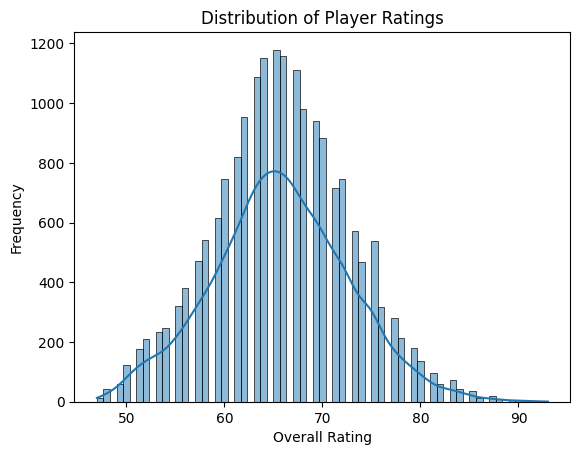

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['↓OVA'], kde=True)
plt.title('Distribution of Player Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-22-c3ff78c0d336>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Name', data=top_players, palette='viridis')


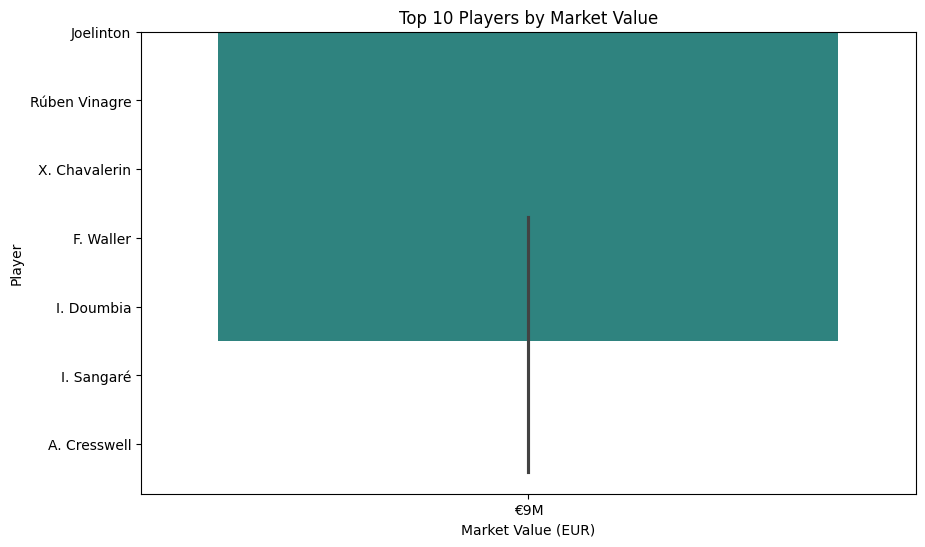

In [22]:
top_players = df[['Name', 'Value']].sort_values(by='Value', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Value', y='Name', data=top_players, palette='viridis')
plt.title('Top 10 Players by Market Value')
plt.xlabel('Market Value (EUR)')
plt.ylabel('Player')
plt.show()

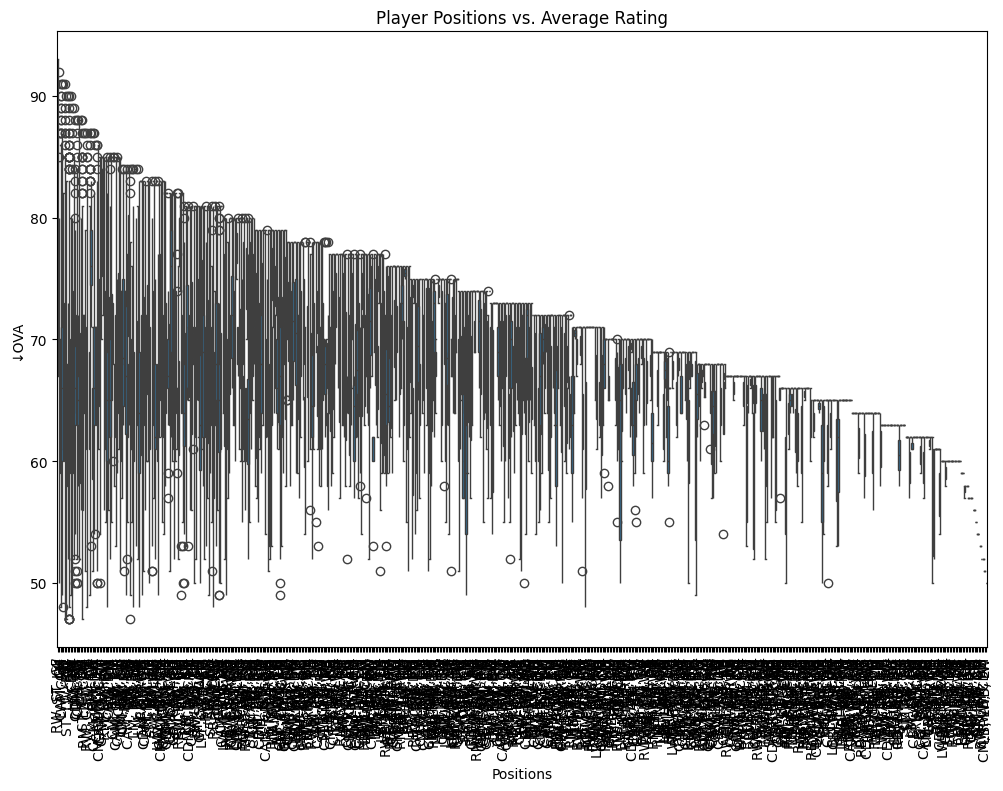

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Positions', y='↓OVA', data=df)
plt.title('Player Positions vs. Average Rating')
plt.xticks(rotation=90)
plt.show()

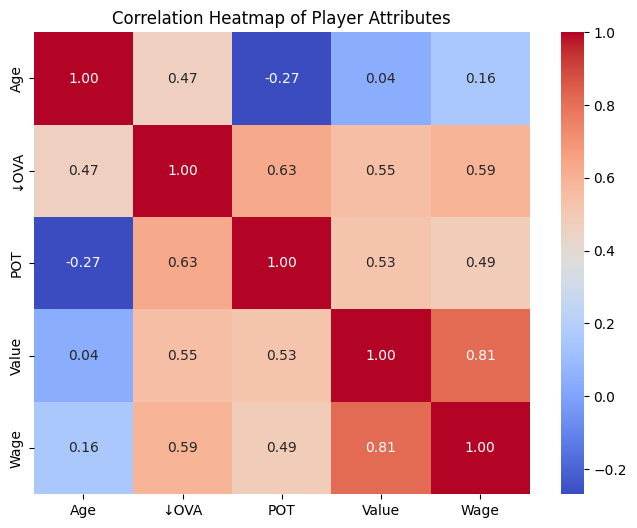

In [29]:
# Convert 'Value' and 'Wage' columns to numeric before calculating correlation
df['Value'] = pd.to_numeric(df['Value'].str.replace('€', '').str.replace('M', 'e6').str.replace('K', 'e3'), errors='coerce')
df['Wage'] = pd.to_numeric(df['Wage'].str.replace('€', '').str.replace('M', 'e6').str.replace('K', 'e3'), errors='coerce')

# Now calculate the correlation
corr = df[['Age', '↓OVA', 'POT', 'Value', 'Wage']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Player Attributes')
plt.show()

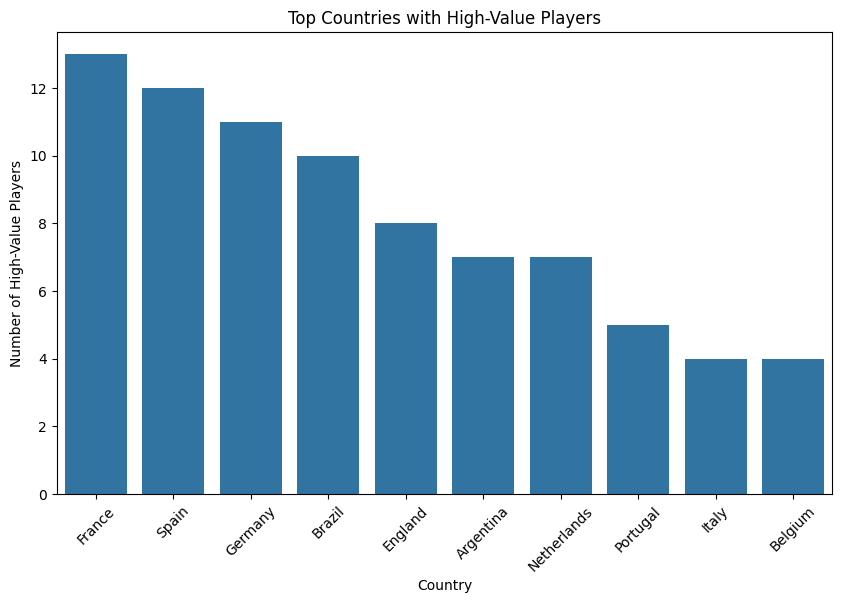

In [30]:
high_value_players = df[df['Value'] > 50_000_000]
country_counts = high_value_players['Nationality'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top Countries with High-Value Players')
plt.xlabel('Country')
plt.ylabel('Number of High-Value Players')
plt.xticks(rotation=45)
plt.show()

In [31]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00
